<a href="https://colab.research.google.com/github/asdjimespoir/Skin_Lesion_Segmentation_Cancer_Detection/blob/main/Yolo_Detection_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tâche 2 : Détection et segmentation de lésions cutanées avec YOLOv8**

>Dans cette tâche nous allons voir comment entrainer la detection d'objets et la segmentation d'image sur un jeux de données personnalisé avec Yolo. Mais avant tout, `c'est quoi YOLOv8 ?` `Qu'est-ce que la détection d'objets ?` `Qu'est que la segmentation d'image ?` sont là des questions auxquelles nous devons répondre.

#### **C'est quoi YOLOv8 ?**

Alors `YOLOv8`  est un modèle de détection d'objets de pointe utilisé dans les tâches de vision par ordinateur. YOLO (You Only Look Once) est un type de réseau de détection d'objets rapide et efficace, ce qui en fait un choix populaire pour la détection d'objets en temps réel dans les applications de vision par ordinateur. YOLOv8 est la huitième version du modèle YOLO et est connu pour être l'un des modèles de détection d'objets les plus performants en termes de précision et de vitesse.

Dans YOLO, une image est divisée en une grille de cellules et pour chaque cellule, le modèle prédit les boîtes englobantes et les probabilités de classe des objets qui pourraient être présents dans la cellule. L'architecture YOLO est conçue pour être rapide, ce qui la rend adaptée à la détection d'objets en temps réel dans diverses applications de vision par ordinateur telles que les véhicules autonomes, la vidéosurveillance et la récupération d'images.

#### **Qu'est-ce que la détection d'objets ?**

La détection d'objets est un domaine de la vision par ordinateur qui a pour but de localiser et d'identifier des objets spécifiques dans une image ou une vidéo. Il s'agit d'une tâche de reconnaissance d'images dans laquelle le système doit être capable de détecter la présence et l'emplacement des objets dans l'image, ainsi que de les classer en différentes catégories, telles que les voitures, les personnes, les animaux, etc.

La détection d'objets est largement utilisée dans de nombreuses applications, notamment la reconnaissance de la circulation, la surveillance vidéo, la reconnaissance de la scène, la reconnaissance de la forme, la reconnaissance d'images, etc. Les algorithmes de détection d'objets peuvent être basés sur des techniques telles que les réseaux de neurones convolutionnels, les méthodes basées sur les caractéristiques, les méthodes basées sur les modèles et les méthodes de détection de bord. Les réseaux de neurones convolutionnels, tels que YOLO et Faster R-CNN, sont actuellement considérés comme les méthodes les plus avancées pour la détection d'objets en raison de leur précision et de leur efficacité en termes de temps de traitement.

 #### **Qu'est que la segmentation d'image ?**

La segmentation d'image est un domaine de la vision par ordinateur qui consiste à diviser une image en plusieurs régions homogènes, appelées segments, en fonction de certains critères. Chaque segment représente une région d'intérêt distincte de l'image, comme un objet, une personne, un animal, etc.

La segmentation d'image est un prétraitement important pour de nombreuses tâches en vision par ordinateur, telles que la reconnaissance d'objets, la reconnaissance de la forme, la reconstruction 3D, etc. Les algorithmes de segmentation d'image peuvent être basés sur des techniques telles que les réseaux de neurones, les algorithmes de filtrage, les algorithmes basés sur les modèles, etc. Les réseaux de neurones, tels que U-Net et SegNet, sont actuellement considérés comme les méthodes les plus avancées pour la segmentation d'image en raison de leur capacité à capturer des caractéristiques complexes et à générer des résultats précis.

## **Préparation du Dataset et importation des modules nécessaires**

Installons la bibliothèque Python `Roboflow` et utilisons l'API associée pour accéder à notre dataset labellisé sur Roboflow et téléchargeons-le au format yolov8.


In [ ]:
from google.colab import drive
drive.mount('/content/Dataset')

In [1]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


In [2]:
import os
HOME = os.getcwd()

!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bOBnXq0Z83ShJXJhxdl4")
project = rf.workspace("asdjim-espoir-guelmian-vi-guelmian-vi").project("cancer-qshvo")
dataset = project.version(4).download("yolov8")


/content/datasets
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 KB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=5bc6b5f4dff3181cd426806fece03de94ef7a763a5ed563e0aee5f78575198e9
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: cycler
    Found existing installation: cycler 0.11.0
    Uninstalling cycler-0.11.0:
      Successfully uninstalled cycler-0.11.0


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Cancer-4 in yolov8:: 100%|██████████| 352/352 [00:00<00:00, 969.93it/s]


## **Détection d'object**

### Formation

Entraînons le modèle YOLOv8s sur un notre dataset importé pour la détection d'objets en utilisant l'outil de ligne de commande YOLO et les paramètres suivants :

- `task=detect` indique que la tâche consiste en une détection d'objets.

- `mode=train` indique que nous souhaitons entraîner un modèle.

- `model=yolov8s.pt` indique que nous souhaitons utiliser le modèle YOLOv8s.

- `data={dataset.location}/data.yaml` fournit l'emplacement des données d'entraînement à partir de la variable dataset définie précédemment.

- `epochs=25` indique que nous souhaitons entraîner le modèle sur 25 époques.

- `imgsz=800` indique la taille de l'image utilisée pour l'entraînement.

- `plots=True` indique que nous souhaitons afficher des graphiques de suivi de la performance du modèle au fil de l'entraînement.


In [6]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=50 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 40.1MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Cancer-4/data.yaml, epochs=50, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch1.jpg
confusion_matrix.png				    train_batch2.jpg
events.out.tfevents.1676248515.707e22ee04e0.2063.0  train_batch320.jpg
F1_curve.png					    train_batch321.jpg
P_curve.png					    train_batch322.jpg
PR_curve.png					    val_batch0_labels.jpg
R_curve.png					    val_batch0_pred.jpg
results.csv					    val_batch1_labels.jpg
results.png					    val_batch1_pred.jpg
train_batch0.jpg				    weights


Affichons la matrice de confusion

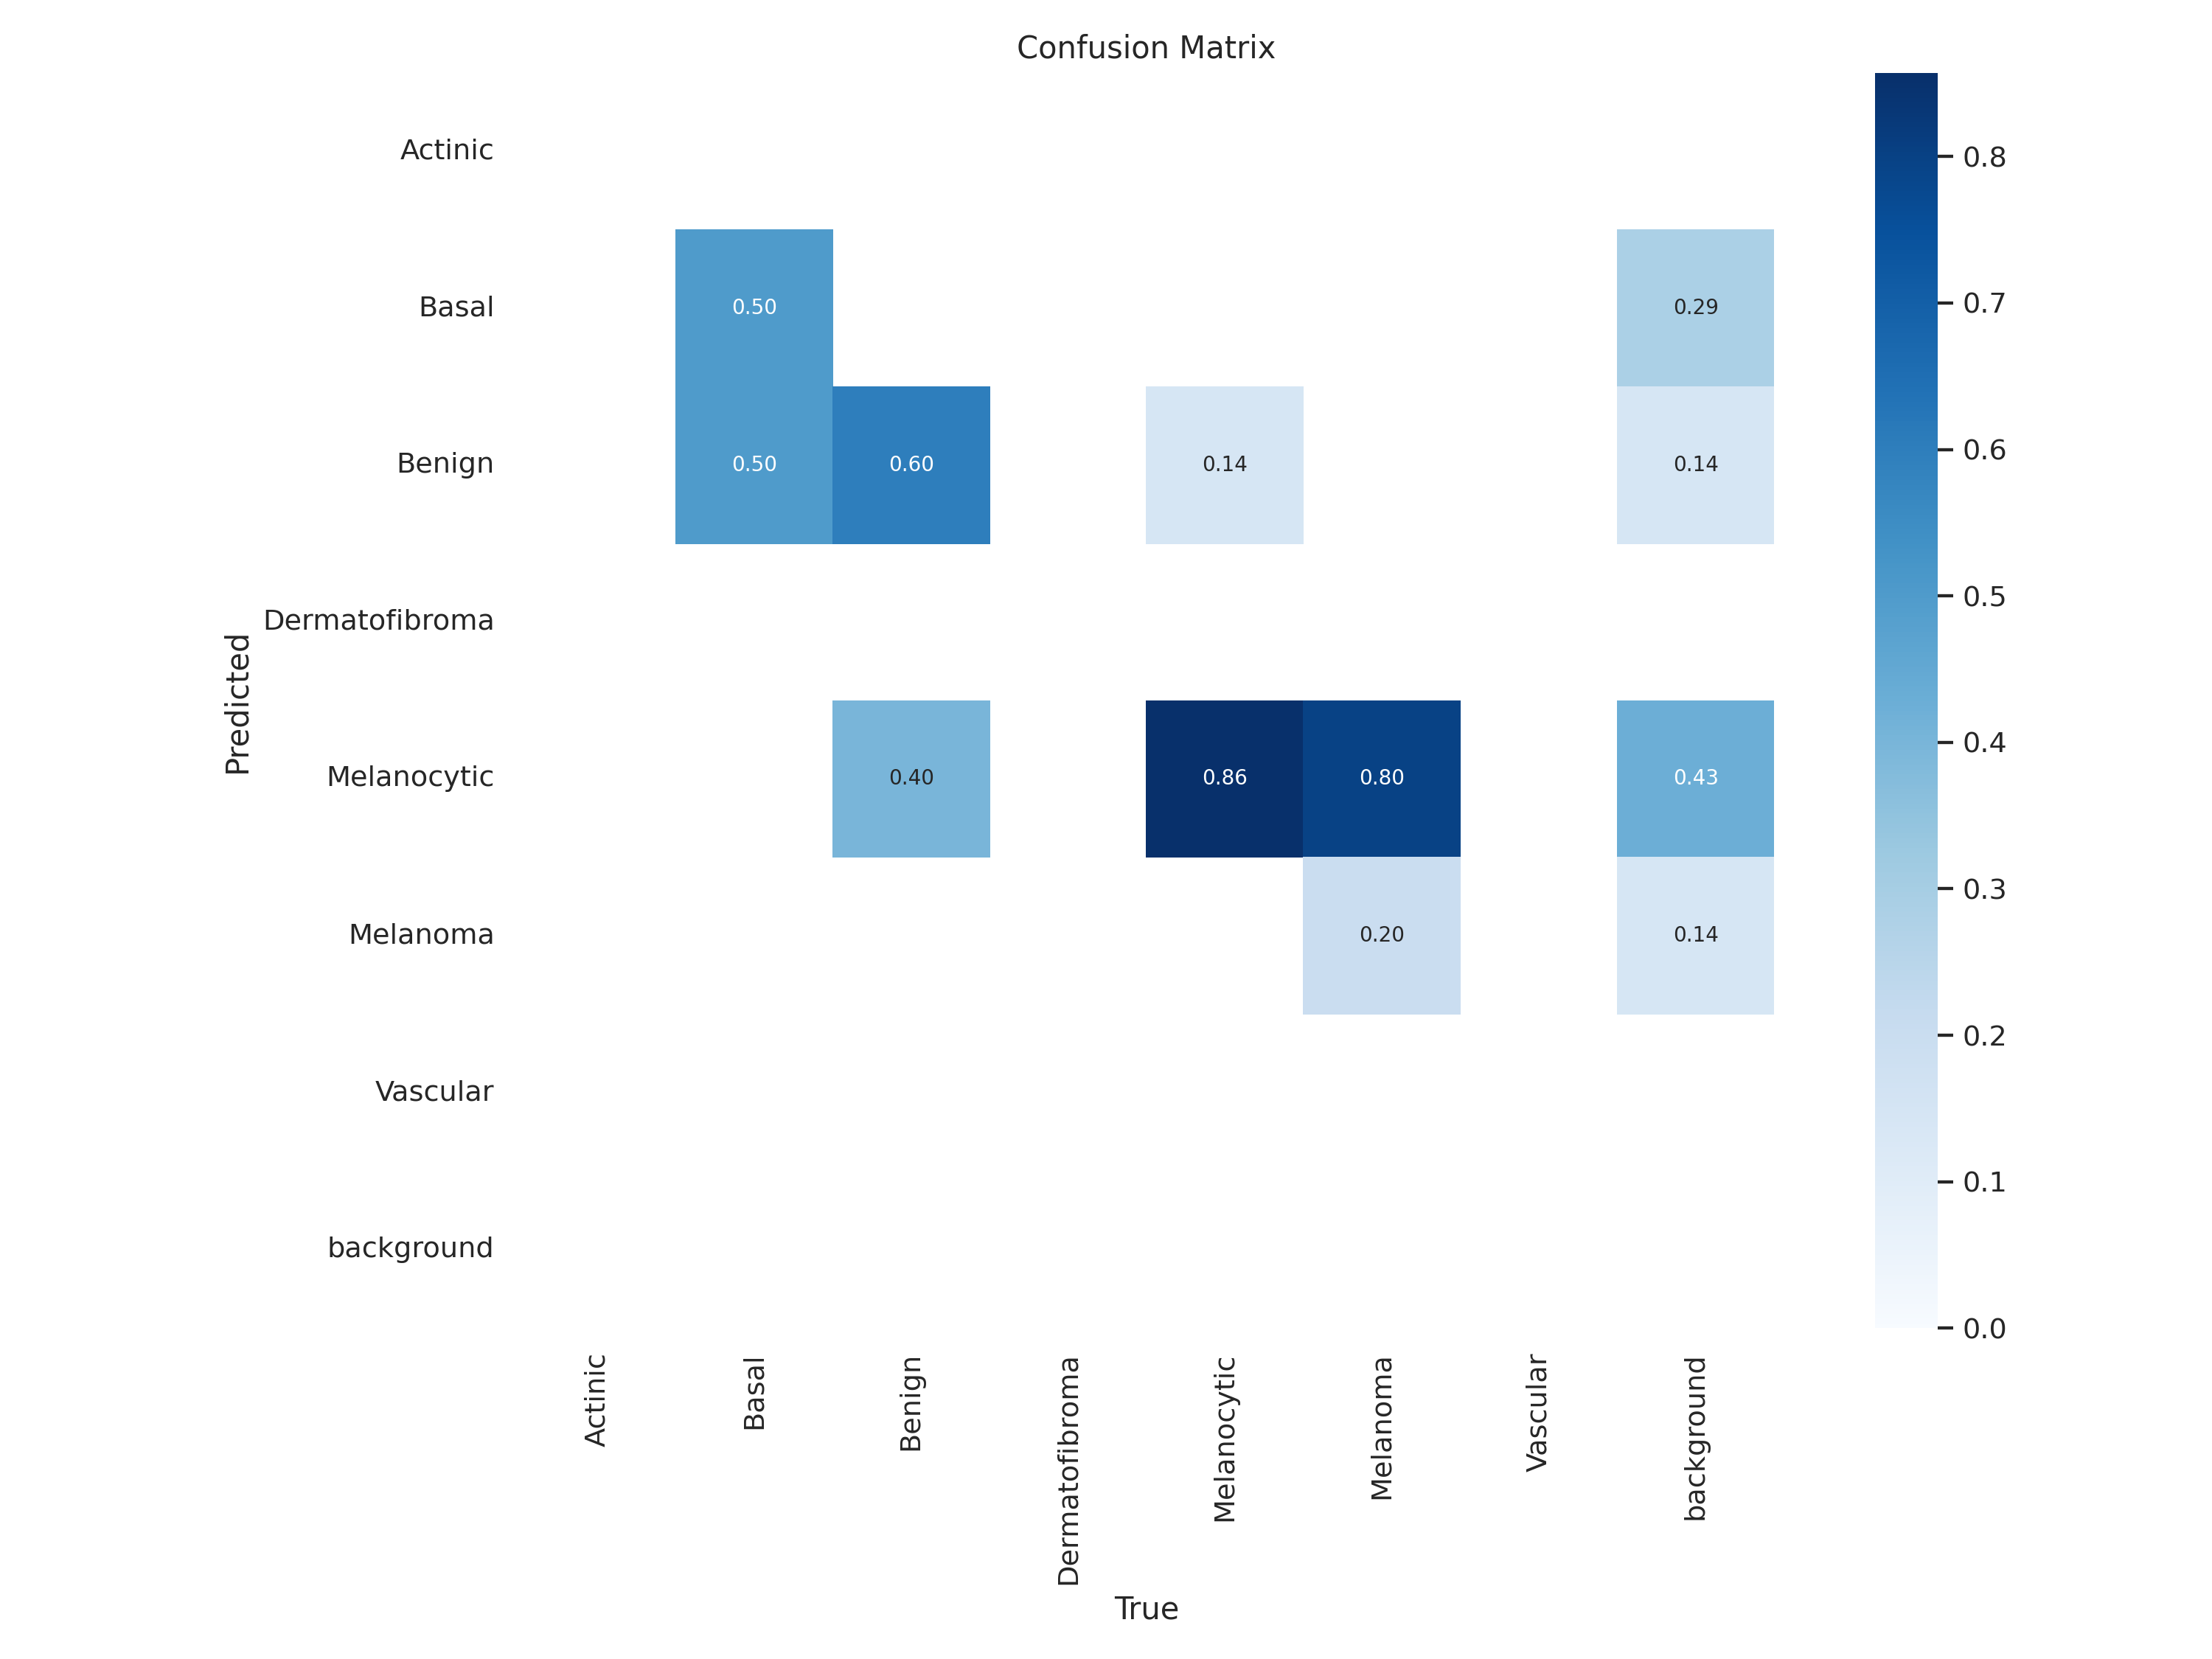

In [14]:
#%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

Affichons les sorties plots des metriques pour les données de formation et de validation

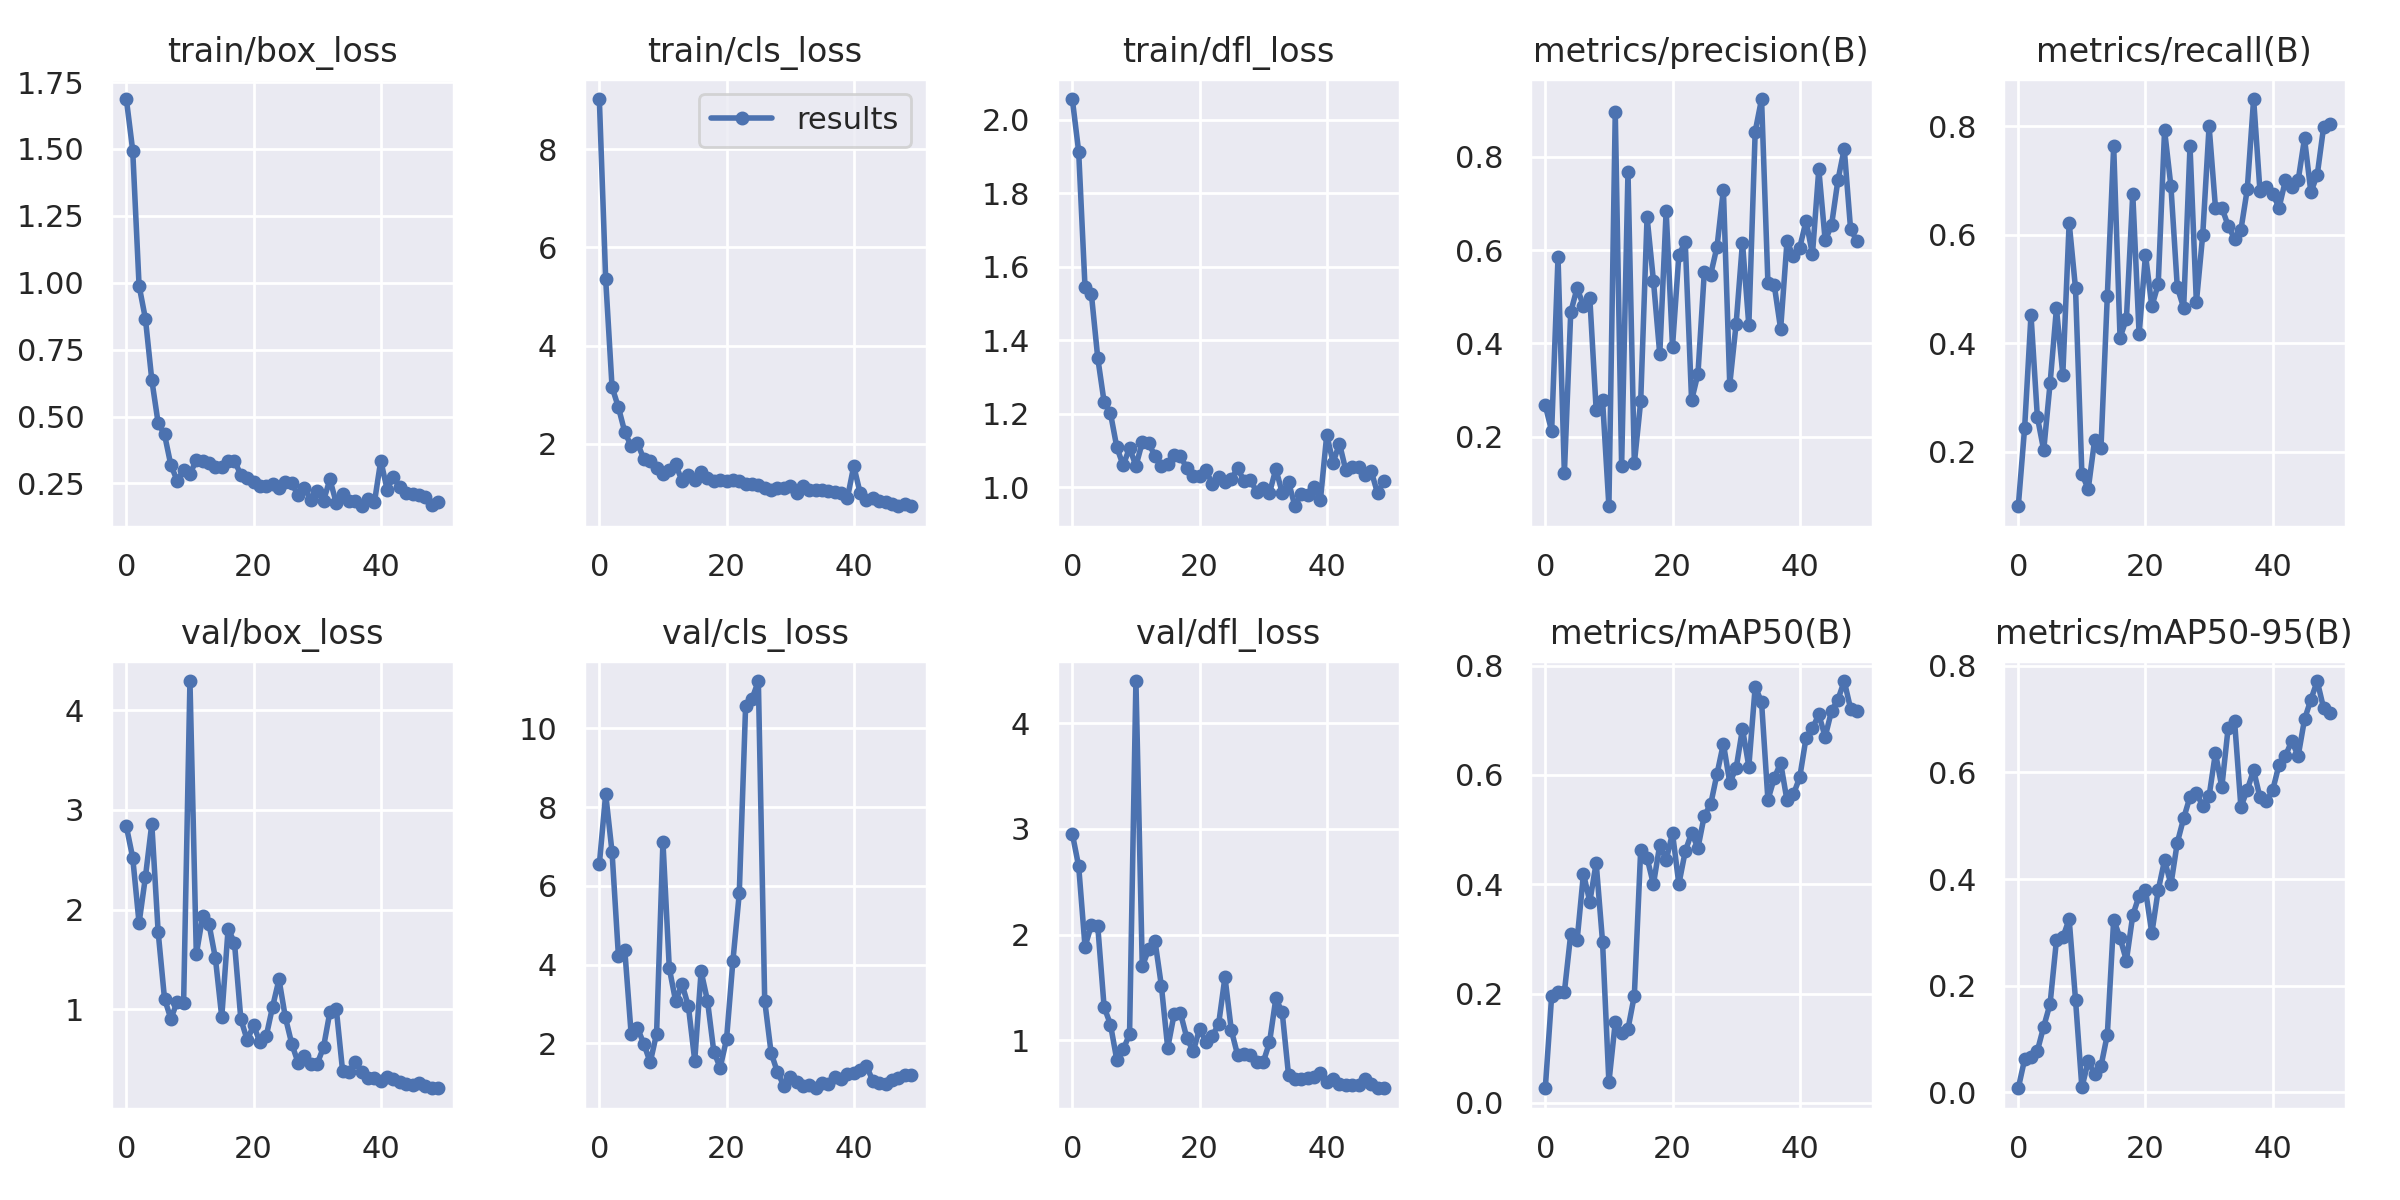

In [15]:
#%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

Resultat des prédiction sur les données de validation

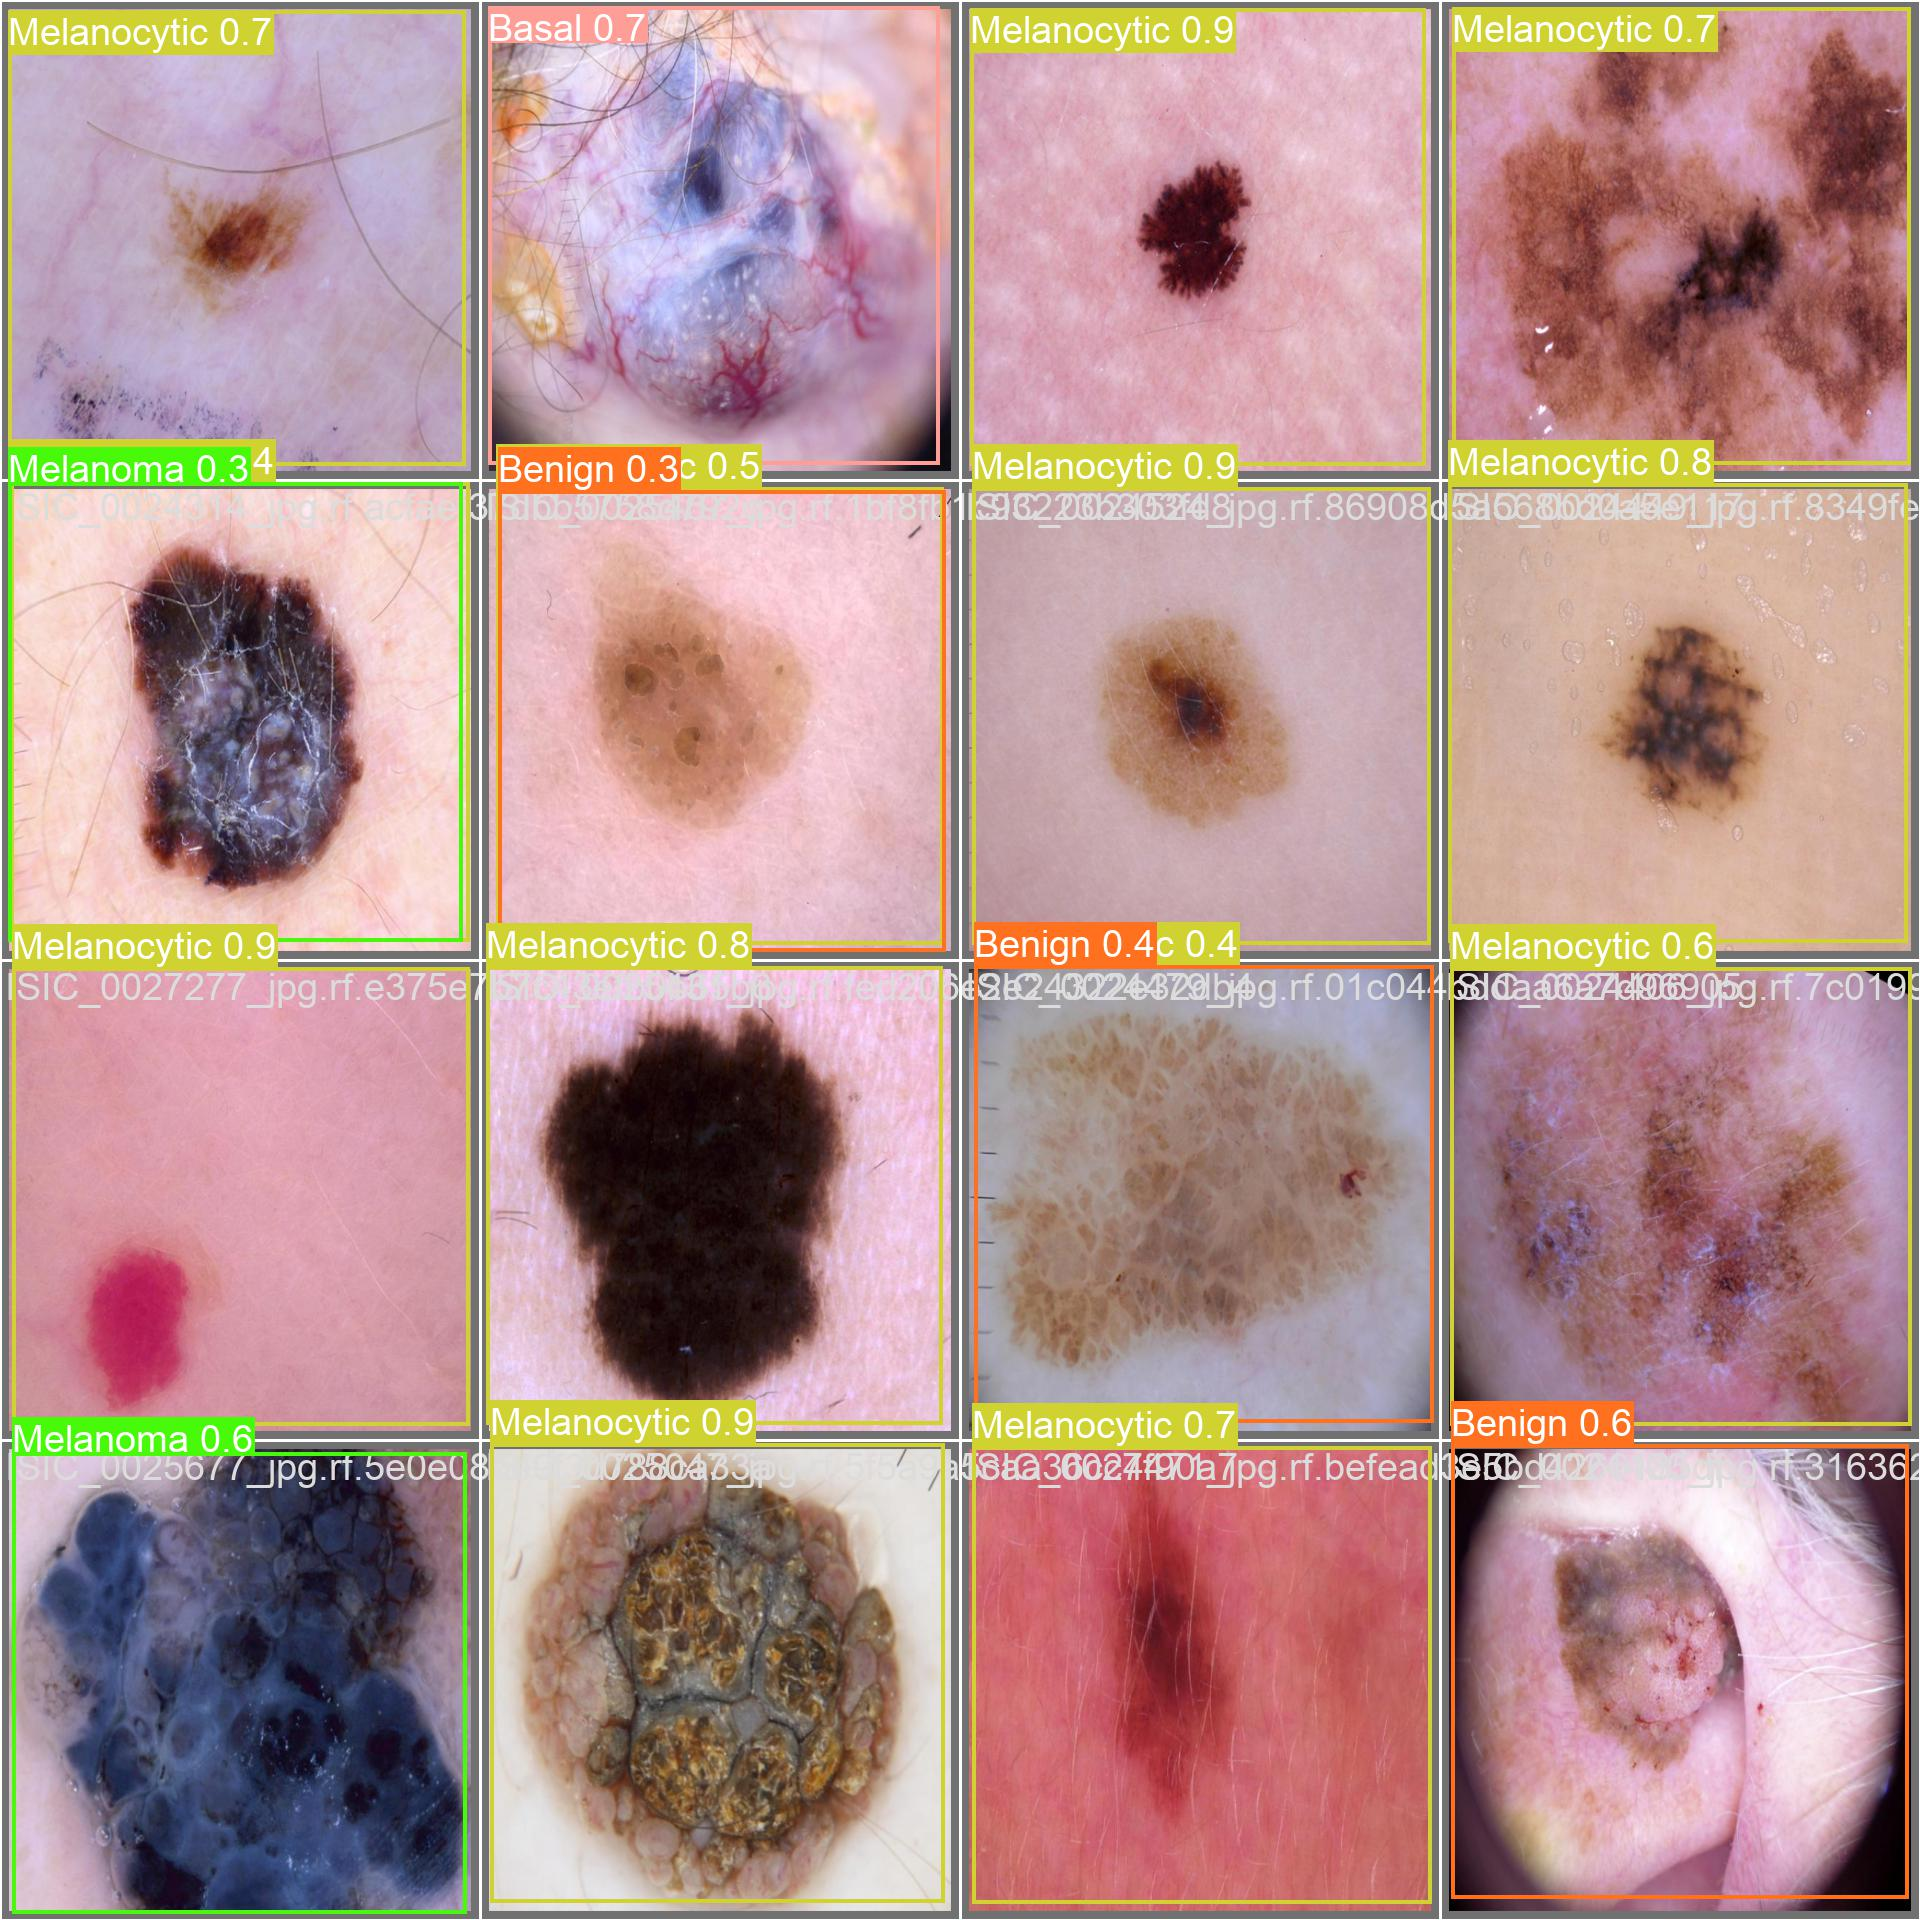

In [16]:
#%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validation du modèle

In [17]:
#%cd {HOME}
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Cancer-4/valid/labels.cache... 33 images, 0 backgrounds, 0 corrupt: 100% 33/33 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:02<00:00,  1.24it/s]
                   all         33         33      0.817      0.708      0.772      0.772
                 Basal         33          2      0.569          1      0.663      0.663
                Benign         33          5          1      0.553      0.707      0.707
           Melanocytic         33         21        0.7      0.905      0.871      0.871
              Melanoma         33          5          1      0.375      0.845      0.845
Speed: 0.3ms pre-process, 21.2ms inference, 0.0ms loss, 1.7ms post-process per image


### Inférence avec le modèle personnalisé

Prédiction sur les données de test avec notre modèle final

In [18]:
#%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11128293 parameters, 0 gradients, 28.5 GFLOPs
image 1/20 /content/datasets/Cancer-4/test/images/ISIC_0024313_jpg.rf.9a9234da30a793d83a212d7bf7259083.jpg: 800x800 1 Melanocytic, 26.1ms
image 2/20 /content/datasets/Cancer-4/test/images/ISIC_0024319_jpg.rf.50f8a4fcf330e3f8a6e5af585b48d85a.jpg: 800x800 1 Melanocytic, 26.2ms
image 3/20 /content/datasets/Cancer-4/test/images/ISIC_0024333_jpg.rf.7527b5b4ecbf126029d14632631bdf21.jpg: 800x800 1 Benign, 28.5ms
image 4/20 /content/datasets/Cancer-4/test/images/ISIC_0024334_jpg.rf.46e39b3a3586a70cd8d52797c8ef9fa0.jpg: 800x800 1 Melanocytic, 26.2ms
image 5/20 /content/datasets/Cancer-4/test/images/ISIC_0024336_jpg.rf.8fc9a74f19251581056bf38f82203984.jpg: 800x800 1 Benign, 26.1ms
image 6/20 /content/datasets/Cancer-4/test/images/ISIC_0024355_jpg.rf.12309d51db52e8be6df9f441b145f7bb.jpg: 800x800 1 Benign, 1 Melanocytic, 26.1ms
imag

**Jetons un coup d'oeil à quelques résultats.**

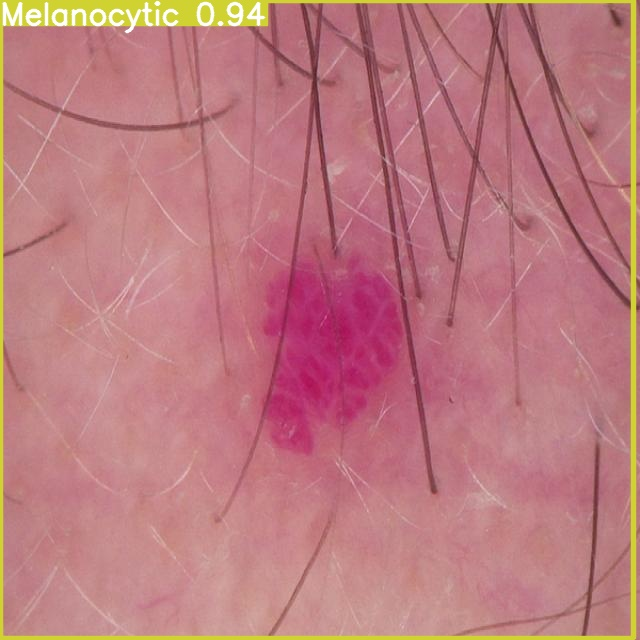

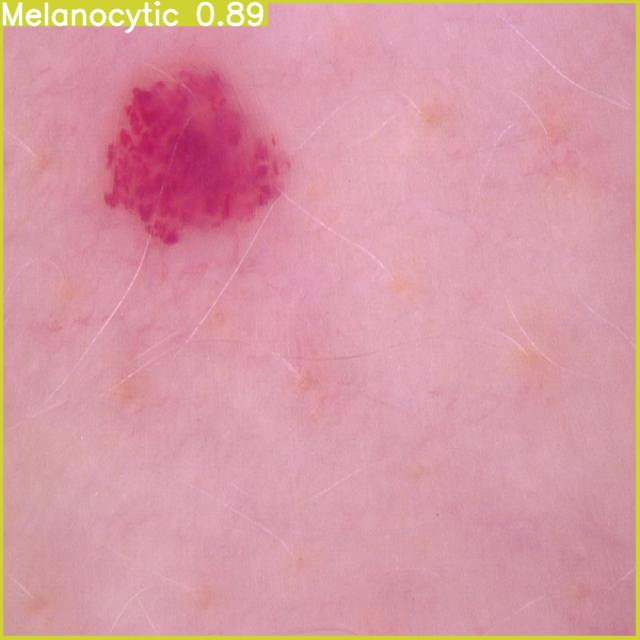

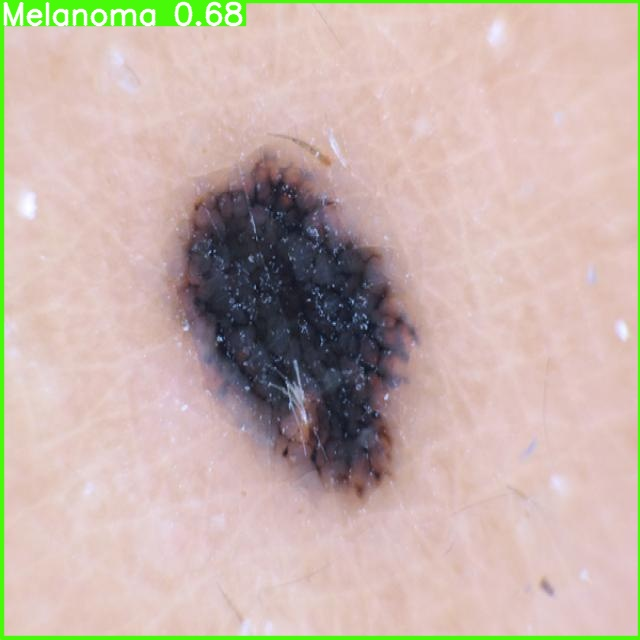

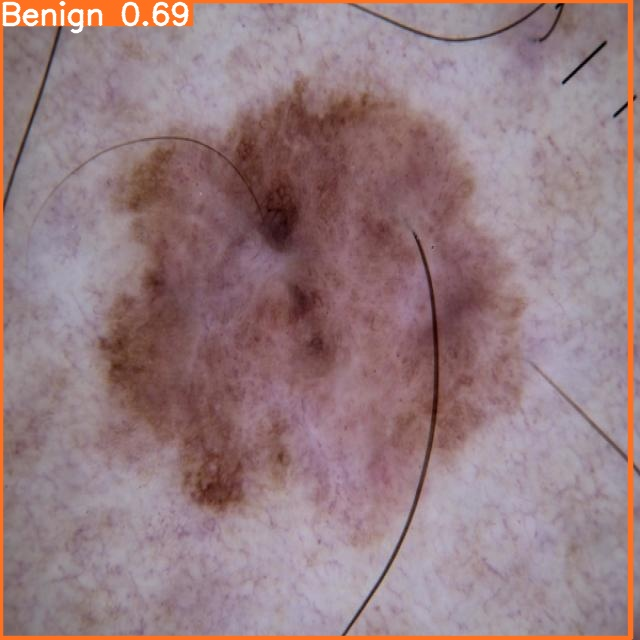

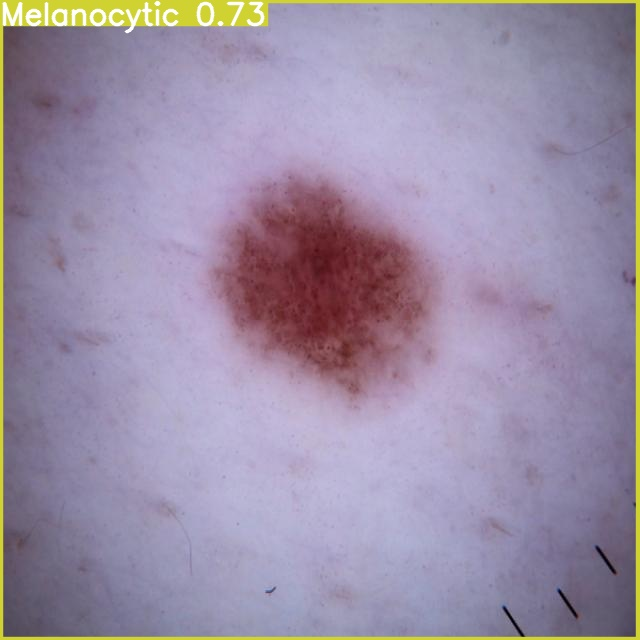

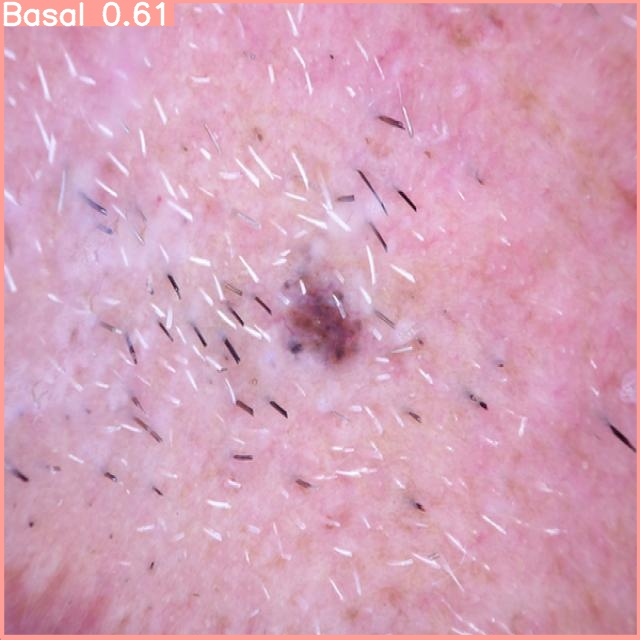

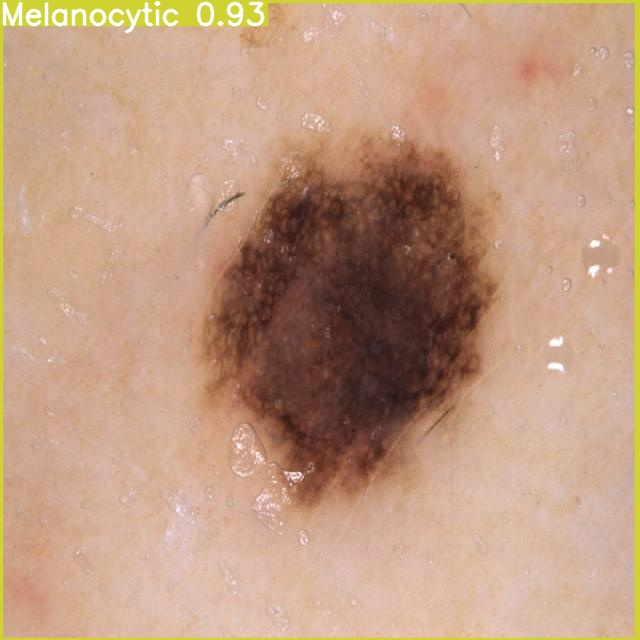

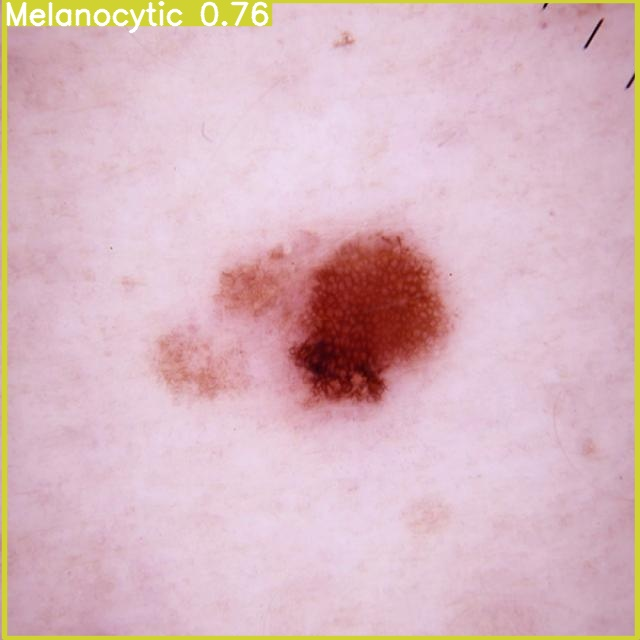

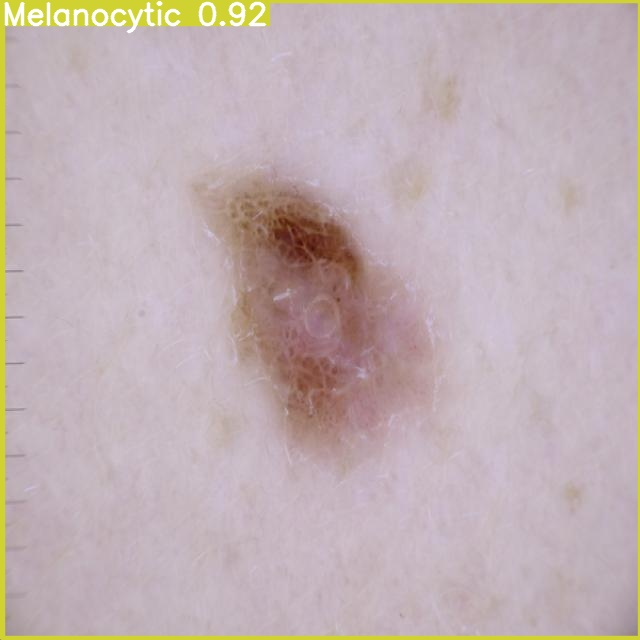

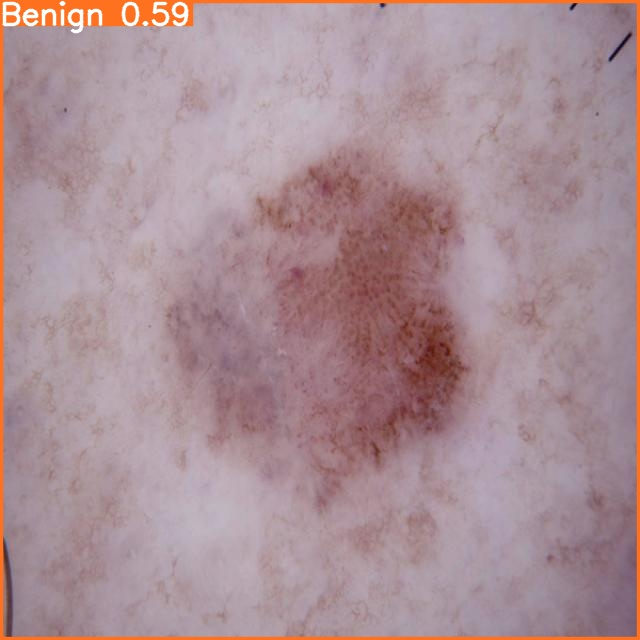

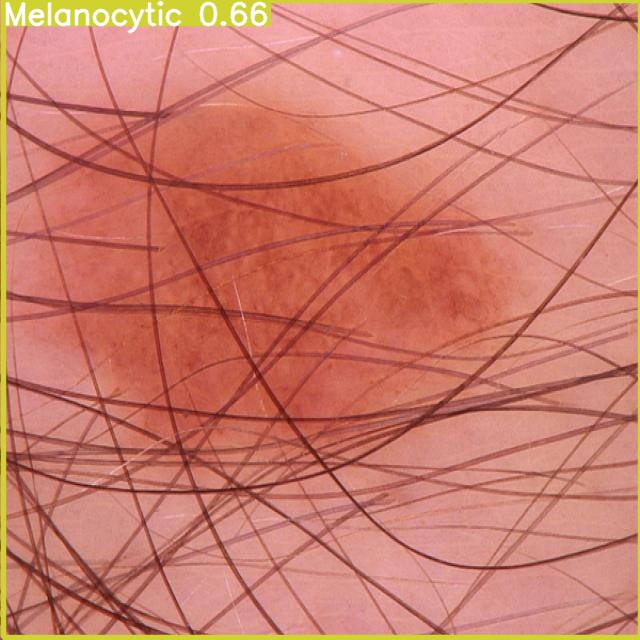

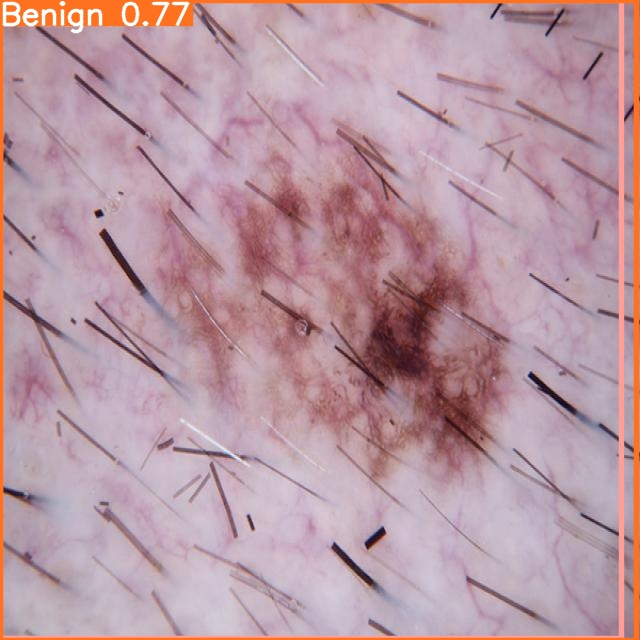

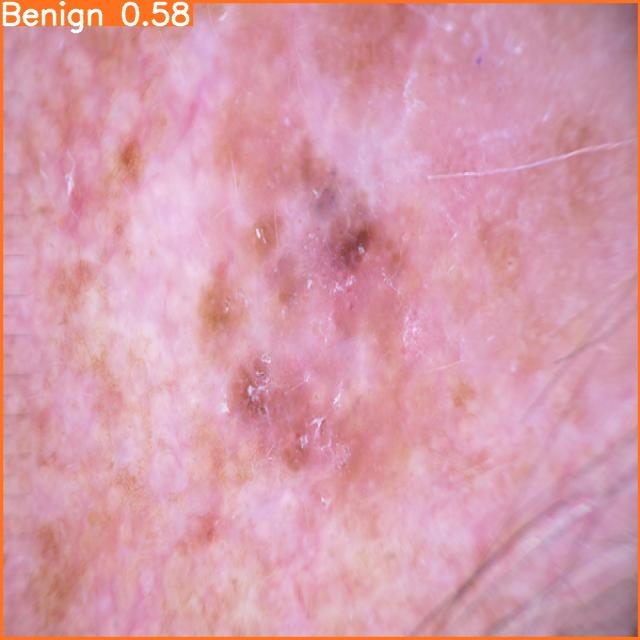

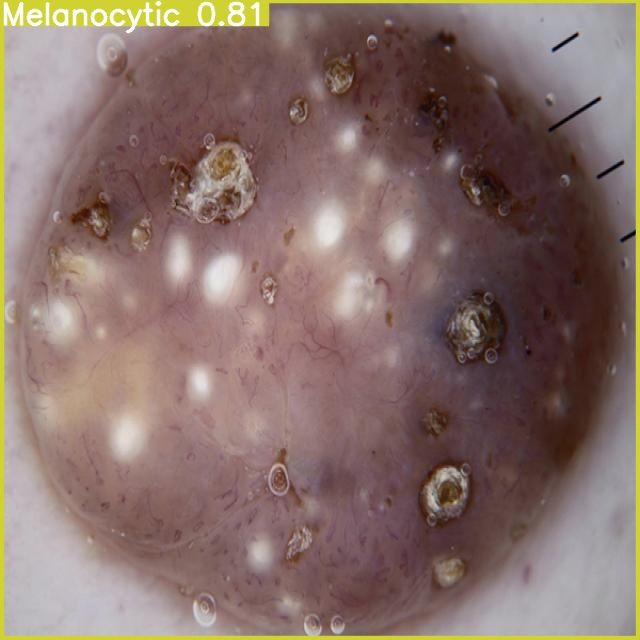

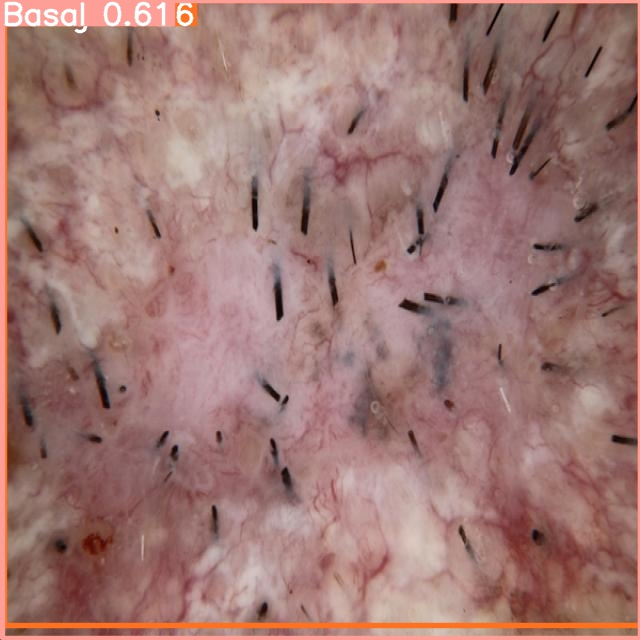

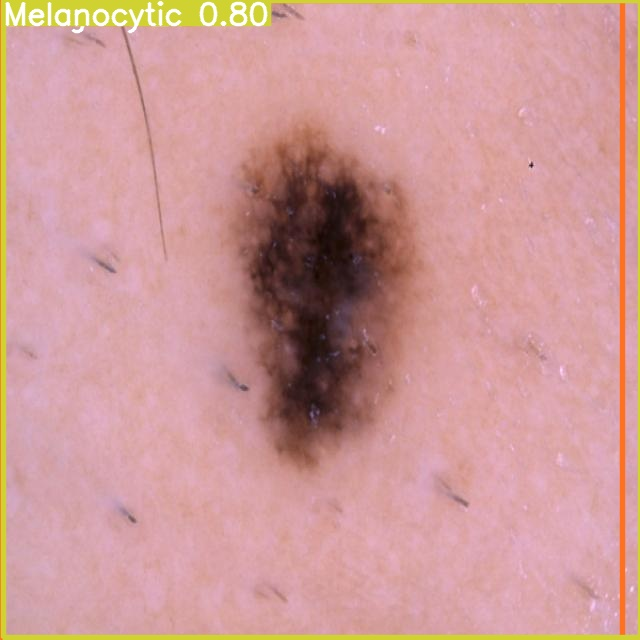

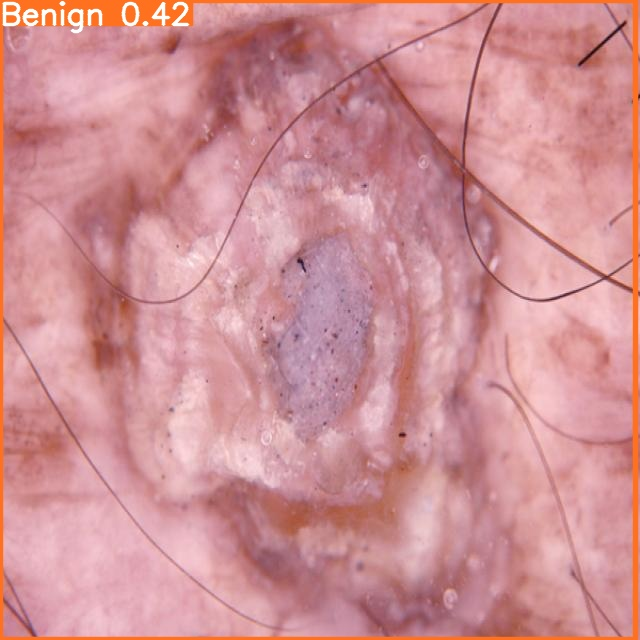

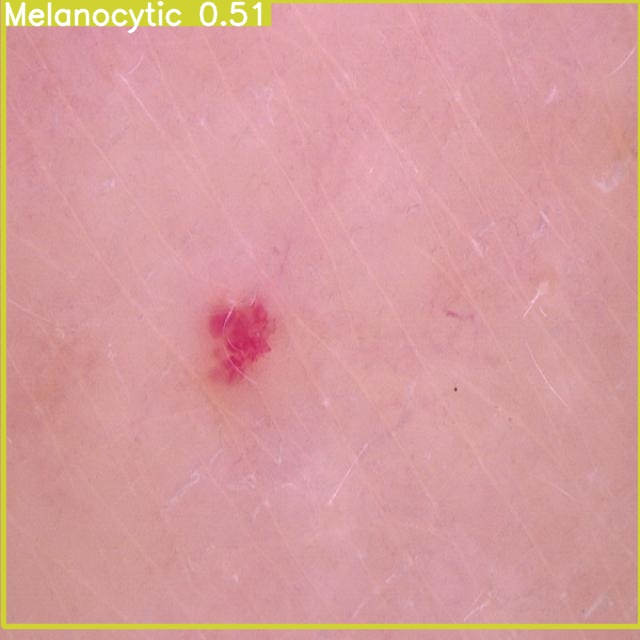

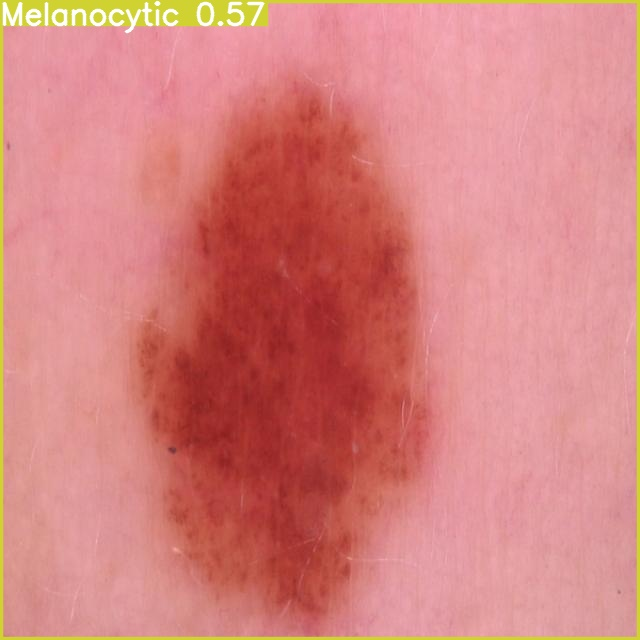

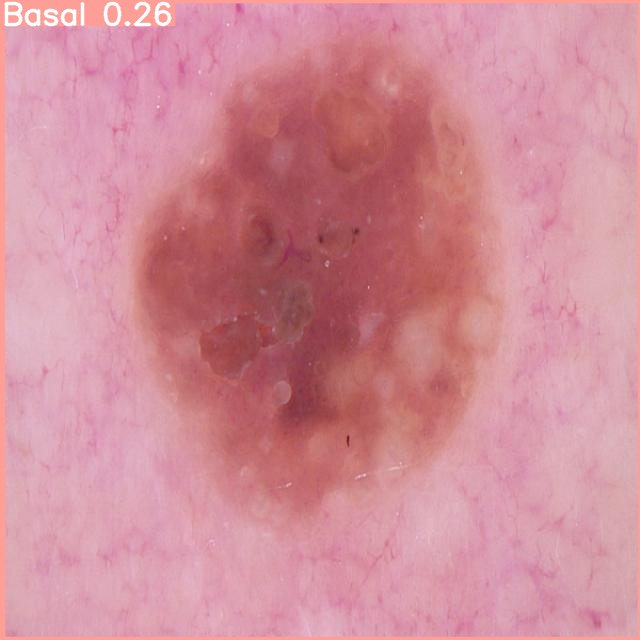

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:]:
      display(Image(filename=image_path, width=300))
      print("\n")

### Déploiement du modèle

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train2/")

In [ ]:
#Exécutez des inférences sur votre modèle à l'aide d'une API en nuage persistante et à mise à l'échelle automatique.

#Chargement du modèle
model = project.version(dataset.version).model

#Choisir une image aléatoire de l'ensemble de test
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

### 🐍 SDK Python

Le moyen le plus simple d'utiliser YOLOv8 directement dans un environnement Python.

In [ ]:
model = YOLO(f'{HOME}/yolov8s.pt')#/runs/detect/train2/weights/best.pt
results = model.predict(source='/content/Drive/MyDrive/DL/HAM/Part_1/ISIC_0027820.jpg', conf=0.25)

In [ ]:
results[0].boxes.xyxy

In [ ]:
results[0].boxes.conf

In [ ]:
results[0].boxes.cls

## **Segmentation instance**

In [ ]:
!yolo task=segment mode=predict model=yolov8l-seg.pt conf=0.4 source='/content/Dataset/MyDrive/DL/Cancer/train/images/ISIC_0024306_jpg.rf.f556f3390b7d284e815c1c1df8209633.jpg' save=True

In [ ]:
%cd {HOME}
Image(filename='runs/segment/predict2/ISIC_0024306_jpg.rf.f556f3390b7d284e815c1c1df8209633.jpg', height=600)

In [ ]:
"""!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="bOBnXq0Z83ShJXJhxdl4")
project = rf.workspace("nicolai-hoirup-nielsen").project("cupsegmentation")
dataset1 = project.version(1).download("yolov8")"""

In [28]:
%cd {HOME}
!yolo task=segment mode=train model=yolov8l-seg.pt data={dataset.location}/data.yaml epochs=10 imgsz=800 plots=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8l-seg.yaml, data=/content/datasets/Cancer-4/data.yaml, epochs=10, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=F

In [25]:

import torch
torch.cuda.empty_cache()

In [27]:
torch.cuda.memory_summary(device=None, abbreviated=False)

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from small pool |       0 B  |       0 B  |       0 B  |       0 B  |\n|---------------------------------------------------------------------------|\n| Active memory         |       0 B  |       0 B  |       0 B  |       0 B  |\n|       from large pool |       0 B  |       0 B  |

In [ ]:
# clone project repository and install dependencies

!git clone https://github.com/ultralytics/yolov5.git # clone
%cd {HOME}/yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

In [ ]:
# infer using segment/predict.py

%cd {HOME}/yolov5
#!python segment/predict.py --weights weights/yolov5s-seg.pt --source /content/Dataset/MyDrive/DL/Cancer/test/images/ISIC_0025427_jpg.rf.e15f52f569ed456c16ee41caad19edac.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference7/ISIC_0025427_jpg.rf.e15f52f569ed456c16ee41caad19edac.jpg", width=600)

In [ ]:
%cd {HOME}/yolov5 
!python segment/train.py --img 320 --batch 128 --epochs 15 --data {HOME}/Cancer-4/data.yaml --weights yolov5s-seg.pt --name custom-dataset
#display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=800)